### 개 품종 분류
- 딥러닝 팀 프로젝트 코드 수정본
- 데이터 출처 : https://www.kaggle.com/datasets/amandam1/120-dog-breeds-breed-classification

개발 포인트
- ImageFolder
- Transforms
- DataLoader
- WeightedRandomSampler
- CNN

(1) 데이터 준비 (Dataset / ImageFolder, DataLoader)

In [2]:
from PIL import Image
import torchvision.transforms as transforms

C:\Users\kdp\.conda\envs\Torch_38\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 지정된 프로시저를 찾을 수 없습니다'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
### 데이터셋에 적용할 변환(전처리) 설정
preprocessing = transforms.Compose([
    transforms.Resize((30, 30)),    # 30x30 크기
    transforms.ToTensor()
])

In [4]:
from torchvision.datasets import ImageFolder

In [5]:
### 데이터셋 생성
# img_root = './Images-resized'
img_root = './modified/BIG'

imgDS = ImageFolder(root=img_root, transform=preprocessing)

In [6]:
len(imgDS)

2030

In [7]:
type(imgDS)

torchvision.datasets.folder.ImageFolder

In [8]:
imgDS.classes

['AfricanHuntingDog_big',
 'Airedale_big',
 'Appenzeller_big',
 'Basset_big',
 'BerneseMountainDog_big',
 'BlackAndTanCoonhound_big',
 'BlenheimSpaniel_big',
 'Bloodhound_big',
 'Bluetick_big',
 'Borzoi_big',
 'BouvierDesFlandres_big',
 'Boxer_big']

In [9]:
imgDS.class_to_idx  # 클래스 이름 : 해당 인덱스

{'AfricanHuntingDog_big': 0,
 'Airedale_big': 1,
 'Appenzeller_big': 2,
 'Basset_big': 3,
 'BerneseMountainDog_big': 4,
 'BlackAndTanCoonhound_big': 5,
 'BlenheimSpaniel_big': 6,
 'Bloodhound_big': 7,
 'Bluetick_big': 8,
 'Borzoi_big': 9,
 'BouvierDesFlandres_big': 10,
 'Boxer_big': 11}

In [10]:
type(imgDS.class_to_idx)

dict

In [11]:
imgDS.imgs

[('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10024.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10038.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10081.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10169.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10215.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10469.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10476.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10493.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10575.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10614.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10640.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10872.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_10895.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n02116738_1097.png', 0),
 ('./modified/BIG\\AfricanHuntingDog_big\\n021167

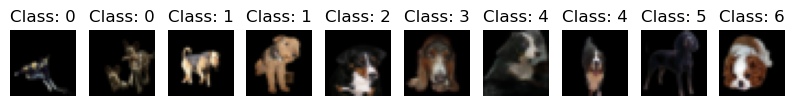

In [12]:
### 데이터 확인
import matplotlib.pyplot as plt
import numpy as np

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(imgDS[i*120][0], (1, 2, 0)))    # (C, H, W) -> (H, W, C)로 변환
    plt.title('Class: ' + str(imgDS[i*120][1]))

In [13]:
# 클래스별 샘플 수 계산
import os

def file_count_in_dir(path):
    """ path : 대장 폴더 주소 """
    if not path.endswith('/'):
        path += '/'
    
    file_count = dict()
    
    datalist = os.listdir(path)
    for data in datalist:
        if os.path.isdir(path + data):
            sub_datalist = os.listdir(path + data)
            file_count[path + data] = len(sub_datalist)
    return file_count

file_count = file_count_in_dir(img_root)
file_count2 = {key.split('/')[-1]: value for key, value in file_count.items()}
print(file_count2)

{'AfricanHuntingDog_big': 167, 'Airedale_big': 199, 'Appenzeller_big': 151, 'Basset_big': 168, 'BerneseMountainDog_big': 217, 'BlackAndTanCoonhound_big': 157, 'BlenheimSpaniel_big': 181, 'Bloodhound_big': 175, 'Bluetick_big': 167, 'Borzoi_big': 148, 'BouvierDesFlandres_big': 149, 'Boxer_big': 151}


In [14]:
sum(file_count2.values())

2030

In [15]:
class_names = imgDS.class_to_idx

class_count = [file_count2[key] for key, value in class_names.items()]
print(class_count)

[167, 199, 151, 168, 217, 157, 181, 175, 167, 148, 149, 151]


In [16]:
### Sampler에서 사용할 가중치 생성
total_image_count = len(class_count)
# weights = [class_count / total_image_count for class_count in class_count]
weights = []
for i, v in enumerate(class_count):
    weights.extend([1 / v] * v)
print(len(weights))

2030


In [17]:
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler

In [18]:
BATCH_SIZE = 64

In [19]:
SAMPLER = WeightedRandomSampler(weights=weights, num_samples=len(imgDS), replacement=True)

In [20]:
imgDL = DataLoader(imgDS, batch_size=BATCH_SIZE, sampler=SAMPLER)

for idx, (img, label) in enumerate(imgDL):
    if idx > 2: break
    print(img.shape, label.shape, label.bincount())

torch.Size([64, 3, 30, 30]) torch.Size([64]) tensor([8, 4, 7, 2, 9, 4, 3, 1, 7, 7, 5, 7])
torch.Size([64, 3, 30, 30]) torch.Size([64]) tensor([ 6,  6,  5, 12,  4,  2,  4,  4,  4,  7,  6,  4])
torch.Size([64, 3, 30, 30]) torch.Size([64]) tensor([7, 4, 4, 4, 6, 6, 4, 4, 7, 5, 8, 5])


In [21]:
for img, label in imgDL:
    # print(img.shape, label.shape)
    print(label.bincount())

tensor([ 6,  6,  3,  5,  0,  4,  6,  6,  3, 14,  8,  3])
tensor([ 6,  6,  4,  6,  6,  4,  3,  6, 11,  2,  2,  8])
tensor([6, 4, 7, 6, 7, 5, 6, 5, 5, 5, 3, 5])
tensor([3, 8, 7, 5, 3, 3, 3, 6, 9, 8, 4, 5])
tensor([3, 8, 7, 5, 4, 5, 5, 6, 9, 4, 6, 2])
tensor([1, 7, 7, 5, 4, 6, 9, 8, 4, 5, 5, 3])
tensor([8, 8, 9, 5, 6, 9, 4, 1, 2, 3, 4, 5])
tensor([5, 4, 8, 6, 7, 6, 3, 6, 4, 5, 7, 3])
tensor([5, 3, 9, 7, 3, 7, 6, 5, 6, 6, 5, 2])
tensor([6, 4, 5, 5, 2, 9, 6, 8, 6, 6, 5, 2])
tensor([7, 7, 3, 2, 7, 4, 7, 8, 7, 4, 3, 5])
tensor([ 4,  8,  5,  3, 10,  4,  4,  6,  5,  2,  6,  7])
tensor([ 2,  4,  9,  4,  5,  5,  7,  5,  4, 11,  4,  4])
tensor([ 6,  9,  7, 10,  3,  4,  4,  3,  5,  5,  3,  5])
tensor([1, 8, 5, 1, 5, 5, 7, 5, 9, 7, 2, 9])
tensor([ 6,  7,  3,  3,  6,  8, 12,  2,  4,  9,  3,  1])
tensor([6, 1, 7, 7, 4, 8, 4, 5, 5, 6, 8, 3])
tensor([ 4,  4,  8,  5,  6,  4,  6, 11,  4,  3,  5,  4])
tensor([ 4, 16,  4,  4,  2,  7,  2,  5,  4,  4,  7,  5])
tensor([ 7,  4,  6,  6,  5,  5,  4,  3,  6, 10,  

(2) CNN 모델 만들기

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
from torchinfo import summary

In [23]:
imgDS[0][0].shape

torch.Size([3, 30, 30])

In [24]:
conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, padding = 1)  # 피처 8개 뽑겠다.
conv1

Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [25]:
output1 = conv1(imgDS[0][0])
output1.shape

torch.Size([8, 30, 30])

In [26]:
pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

In [27]:
output2 = pool(output1)
output2.shape

torch.Size([8, 15, 15])

In [28]:
conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
conv2

Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [29]:
output3 = conv2(output2)
output3.shape

torch.Size([16, 15, 15])

In [30]:
output4 = pool(output3)
output4.shape

torch.Size([16, 7, 7])

In [31]:
output4.view(-1, 16 * 7 * 7).shape

torch.Size([1, 784])

In [37]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc1 = nn.Linear(16 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 12)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = x.view(-1, 16 * 7 * 7)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        # x = F.log_softmax(x)  # CrossEntropy()에 중복
        return x

(3) CNN 학습하기

In [38]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

EPOCHS = 100

model = CNN().to(DEVICE)

optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss()

print(model)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=12, bias=True)
)


In [39]:
def train(epoch, model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx:2d}]\tTrain Loss: {loss.item():.6f}")

In [40]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [41]:
## train에 쓰는 데이터와 test에 쓰는 데이터를 다르게 둬야 하는데, 지금은 그렇게 하지 못 함.
test_loss_list, test_accuracy_list = [], []

for epoch in range(1, EPOCHS + 1):
    
    train(epoch, model, imgDL, optimizer, log_interval = 10)
    test_loss, test_accuracy = evaluate(model, imgDL)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_accuracy)
    
    print(f"\n[EPOCH: {epoch}], \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")

Train Epoch: 1 [ 0]	Train Loss: 2.486172
Train Epoch: 1 [10]	Train Loss: 2.481033
Train Epoch: 1 [20]	Train Loss: 2.459486
Train Epoch: 1 [30]	Train Loss: 2.496032

[EPOCH: 1], 	Test Loss: 0.0389, 	Test Accuracy: 11.23 % 
Train Epoch: 2 [ 0]	Train Loss: 2.434981
Train Epoch: 2 [10]	Train Loss: 2.425873
Train Epoch: 2 [20]	Train Loss: 2.262675
Train Epoch: 2 [30]	Train Loss: 2.354716

[EPOCH: 2], 	Test Loss: 0.0377, 	Test Accuracy: 13.89 % 
Train Epoch: 3 [ 0]	Train Loss: 2.427644
Train Epoch: 3 [10]	Train Loss: 2.299470
Train Epoch: 3 [20]	Train Loss: 2.121894
Train Epoch: 3 [30]	Train Loss: 2.280167

[EPOCH: 3], 	Test Loss: 0.0356, 	Test Accuracy: 19.51 % 
Train Epoch: 4 [ 0]	Train Loss: 2.395515
Train Epoch: 4 [10]	Train Loss: 2.276325
Train Epoch: 4 [20]	Train Loss: 2.220006
Train Epoch: 4 [30]	Train Loss: 2.307065

[EPOCH: 4], 	Test Loss: 0.0346, 	Test Accuracy: 21.58 % 
Train Epoch: 5 [ 0]	Train Loss: 2.205140
Train Epoch: 5 [10]	Train Loss: 2.133832
Train Epoch: 5 [20]	Train Loss

KeyboardInterrupt: 

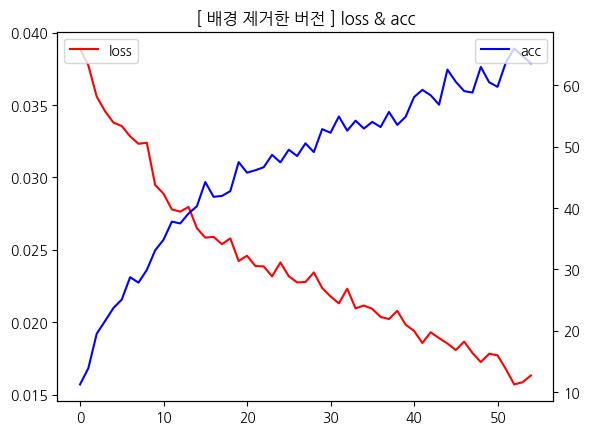

In [43]:
### 테스트 Loss와 Acc 시각화
import koreanize_matplotlib

fig, ax1 = plt.subplots()
ax1.plot(test_loss_list, label='loss', color='red')

ax2 = ax1.twinx()
ax2.plot(test_accuracy_list, label='acc', color='blue')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('[ 배경 제거한 버전 ] loss & acc')
plt.show()